### **The Sparks Foundation**

GRIP (Graduate Rotational Internship Program)

Data Analytics and Buisness Analysis

NAME: SIDDHI GAUTAM SHAH

PROJECT: To perform Exploratory Data Analysis on the dataset Sample SuperStore


## Data Analysis on Supermarket data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('SampleSuperstore.csv')
raw_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Cleaning the Data

In [3]:
raw_df.shape

(9994, 13)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
raw_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
raw_df.duplicated().sum()

17

In [7]:
df = raw_df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(9977, 13)

### The data is now clean. As there are no duplicate and missing values

In [10]:
# Let's understand the data and different values in column.

cols = ['Ship Mode','Segment','Country','Region','Category','Sub-Category']

for i in cols:
    cat = df[i].unique()
    print(f'{i}: ',cat)
    print('\n')

Ship Mode:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']


Segment:  ['Consumer' 'Corporate' 'Home Office']


Country:  ['United States']


Region:  ['South' 'West' 'Central' 'East']


Category:  ['Furniture' 'Office Supplies' 'Technology']


Sub-Category:  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']




# Data Analysis

## State-Wise Sale

In [11]:
states = df.groupby(['State']).agg('sum').reset_index()
state_sales = states.drop(['Postal Code','Quantity','Discount','Profit'], axis=1)
state_sales_10 = state_sales.sort_values(by='Sales', ascending = False)
state_sales_max10 = state_sales_10.head(10)
state_sales_min10 = state_sales_10.tail(10)
state_sales_max10

,State,Sales
3,California,457576.2715
30,New York,310827.1510
41,Texas,170124.5418
45,Washington,138560.8100
36,Pennsylvania,116496.3620
8,Florida,89473.7080
11,Illinois,80162.5370
33,Ohio,77976.7640
20,Michigan,75879.6440
44,Virginia,70636.7200


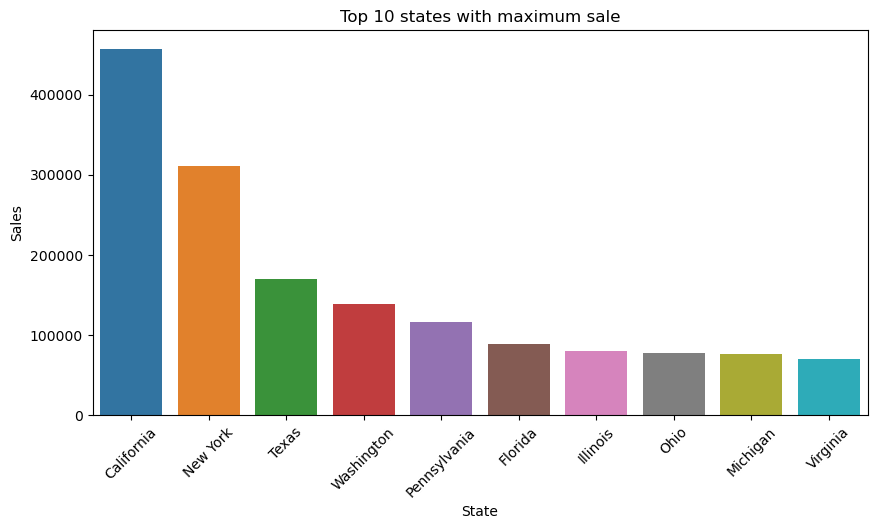

In [12]:
plt.figure(figsize=(10,5))

sns.barplot(data=state_sales_max10, x='State', y='Sales')
plt.title('Top 10 states with maximum sale')
plt.xticks(rotation=45)


plt.show()

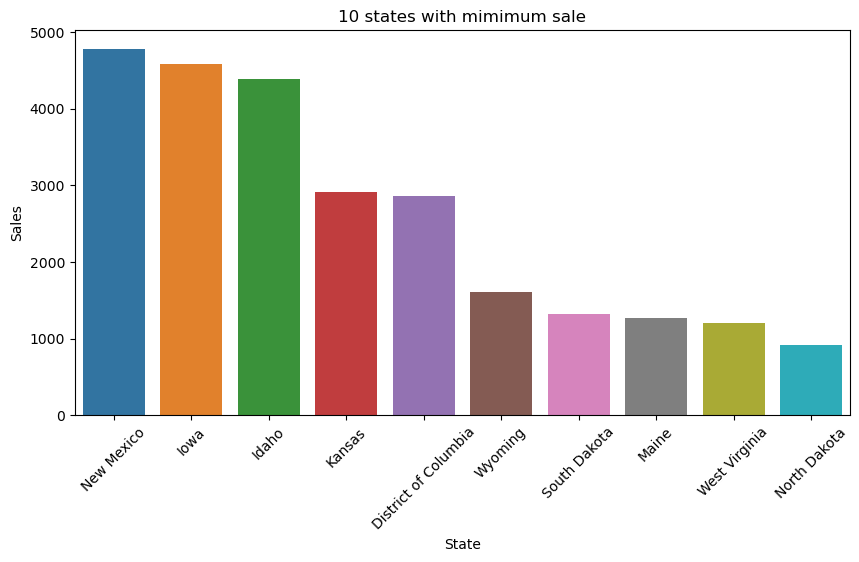

In [13]:
plt.figure(figsize=(10,5))

sns.barplot(data=state_sales_min10, x='State', y='Sales')
plt.title('10 states with mimimum sale')
plt.xticks(rotation=45)

plt.show()

## Insight

It can be seen in the above graph that this 10 states has the less sale. 

## Region-Wise Sale

In [14]:
region = df.groupby(['Region'])['Sales'].agg('sum').reset_index()
region

,Region,Sales
0,Central,500782.8528
1,East,678435.1960
2,South,391721.9050
3,West,725255.6365


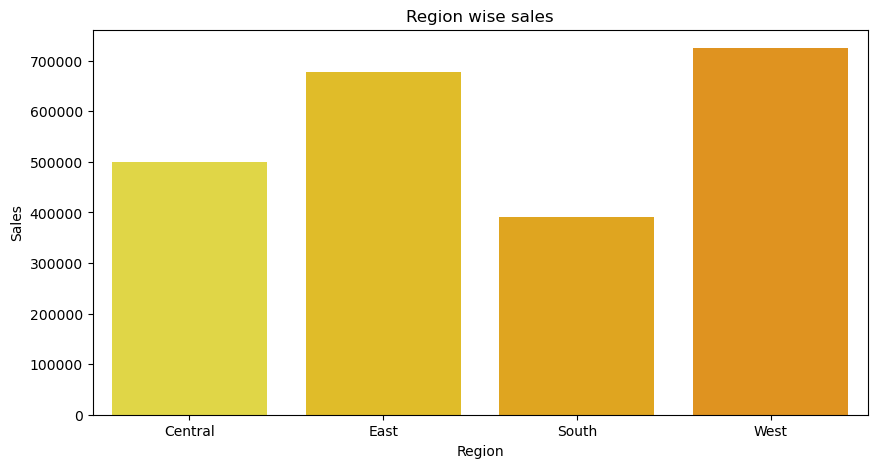

In [15]:
plt.figure(figsize=(10,5))

sns.barplot(data=region, x='Region', y='Sales', palette='Wistia')
plt.title('Region wise sales')


plt.show()

In [16]:
region_profit = df.groupby(['Region'])['Profit'].agg('sum').reset_index()
region_profit

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


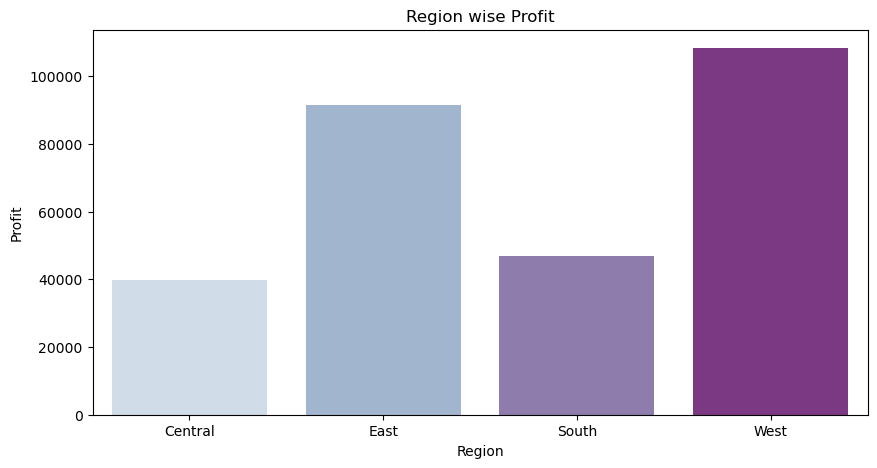

In [17]:
plt.figure(figsize=(10,5))

sns.barplot(data=region_profit, x='Region', y='Profit', palette='BuPu')
plt.title('Region wise Profit')


plt.show()

In [18]:
region_dist = df.groupby(['Region'])['Discount'].agg('sum').reset_index()
region_dist

,Region,Discount
0,Central,557.14
1,East,413.50
2,South,238.55
3,West,350.00


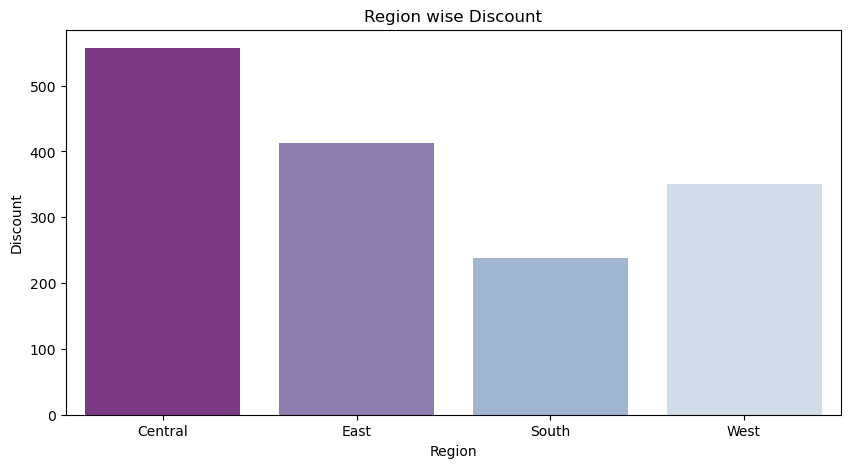

In [19]:
plt.figure(figsize=(10,5))

sns.barplot(data=region_dist, x='Region', y='Discount', palette='BuPu_r')
plt.title('Region wise Discount')


plt.show()

Maximum Sale is in **west** region

Maximum profit is in **west** region

Maximum discount is given **central** region

## Which Shipping mode is used the most?

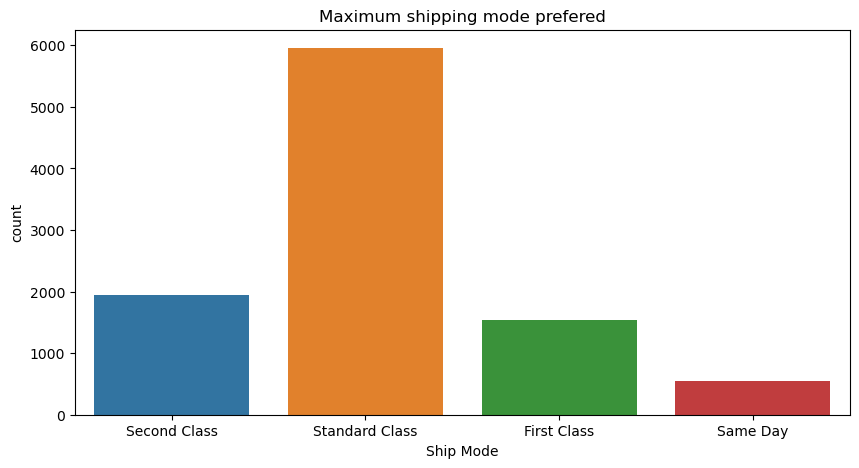

In [20]:
plt.figure(figsize = (10,5))

sns.countplot(data=df, x='Ship Mode')
plt.title('Maximum shipping mode prefered')

plt.show()

### Insight

From the above graph it can be seen that **Standard Class** shipping mode is prefered the most

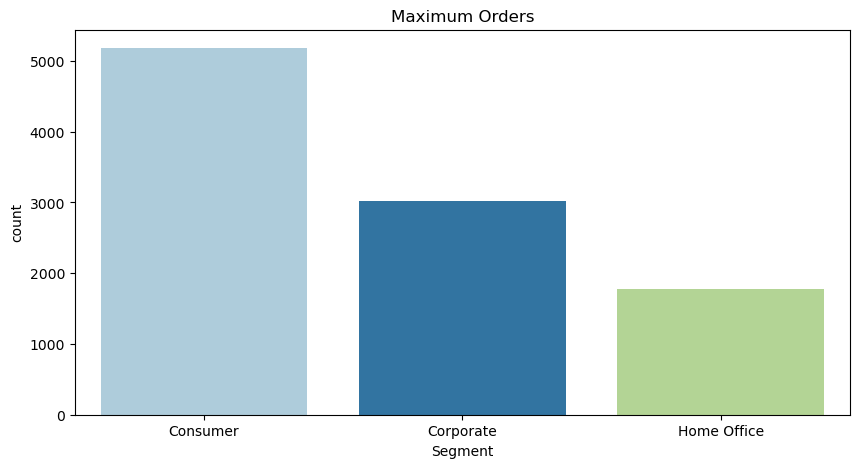

In [21]:
plt.figure(figsize = (10,5))

sns.countplot(data=df, x='Segment', palette='Paired')
plt.title('Maximum Orders')

plt.show()

### Insight

There are maximum orders from **Consumer segment**

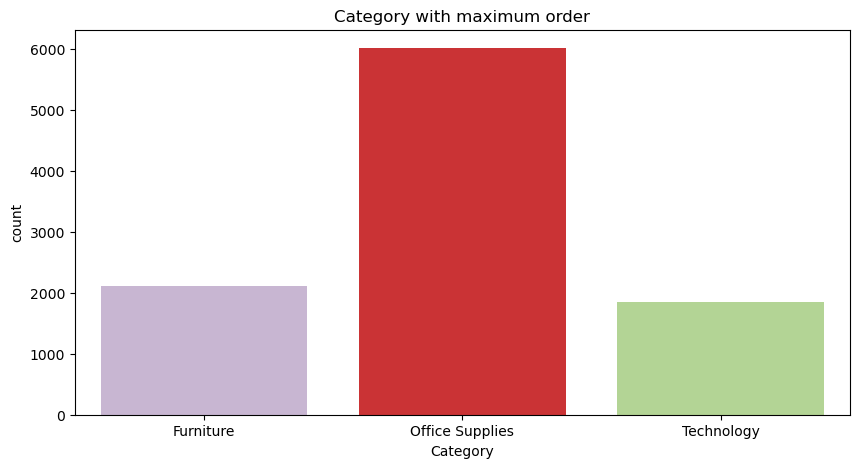

In [22]:
plt.figure(figsize = (10,5))

sns.countplot(data=df, x='Category', palette='Paired_r')
plt.title('Category with maximum order')

plt.show()

### Insight
It can be seen that items from **Office Supplies** is the category customers purchase the most from this super market.

## Dividing the Dataset in Category, Sub-category and analysing

In [23]:
grp1 = df.groupby(['Category','Sub-Category']).agg('count').reset_index()
grp1 = grp1.iloc[:,0:3]
grp1.columns = ['Category','Sub-Category','Count']
grp1

,Category,Sub-Category,Count
0,Furniture,Bookcases,228
1,Furniture,Chairs,615
2,Furniture,Furnishings,956
3,Furniture,Tables,319
4,Office Supplies,Appliances,466
5,Office Supplies,Art,795
6,Office Supplies,Binders,1522
7,Office Supplies,Envelopes,254
8,Office Supplies,Fasteners,217
9,Office Supplies,Labels,363


In [24]:
furniture = grp1.iloc[:4,:]
offs = grp1.iloc[4:13,:]
tech = grp1.iloc[13:,:]

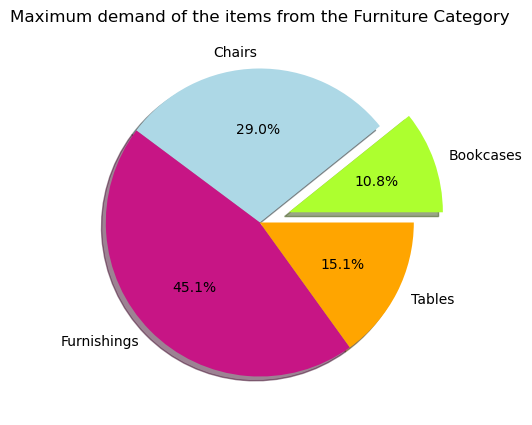

In [25]:
mycolors = ['#ADFF2F','#ADD8E6','#C71585','#FFA500','#800080','#40E0D0','#EE82EE','#FF6347','#9ACD32']
myexplode = [0.2,0,0,0]



plt.figure(figsize=(10,5))
plt.pie(data=furniture, x='Count', labels='Sub-Category', explode=myexplode, 
        colors= mycolors, shadow=True, autopct='%1.1f%%')
plt.title('Maximum demand of the items from the Furniture Category')

plt.show()

### Insight
We can see that maximum orders are from **Furnishings** and least from **Bookcases**

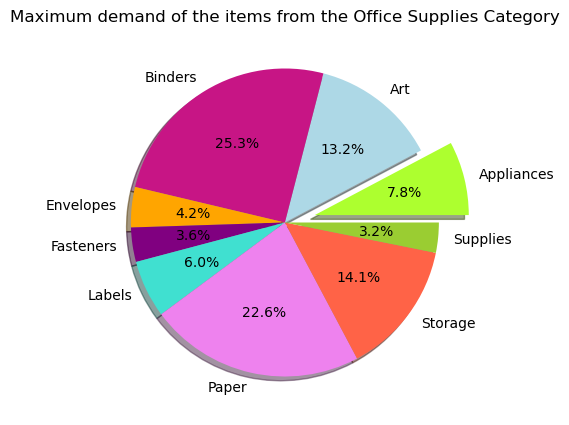

In [26]:
mycolors = ['#ADFF2F','#ADD8E6','#C71585','#FFA500','#800080','#40E0D0','#EE82EE','#FF6347','#9ACD32']
myexplode = [0.2,0,0,0,0,0,0,0,0]



plt.figure(figsize=(10,5))
plt.pie(data=offs, x='Count', labels='Sub-Category', explode=myexplode, 
        colors= mycolors, shadow=True, autopct='%1.1f%%')
plt.title('Maximum demand of the items from the Office Supplies Category')

plt.show()

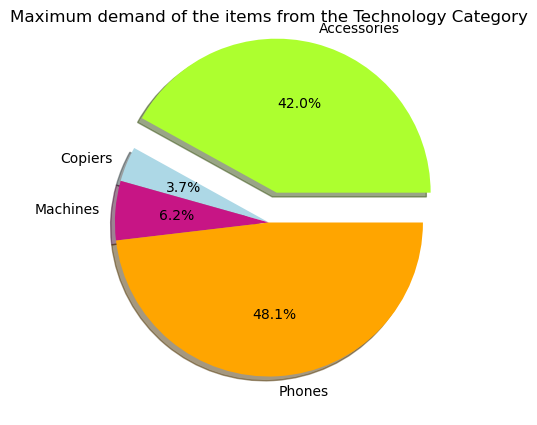

In [27]:
mycolors = ['#ADFF2F','#ADD8E6','#C71585','#FFA500','#800080','#40E0D0','#EE82EE','#FF6347','#9ACD32']
myexplode = [0.2,0,0,0]



plt.figure(figsize=(10,5))
plt.pie(data=tech, x='Count', labels='Sub-Category', explode=myexplode, 
        colors= mycolors, shadow=True, autopct='%1.1f%%')

plt.title('Maximum demand of the items from the Technology Category')

plt.show()

## Let's check the sales and profit based on category and sub-category.

## Furniture

In [28]:
furn = df[df['Category']=='Furniture']
furn.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092


In [29]:
state_wise = furn.groupby(['State']).agg('count').reset_index()
state_wise = state_wise.iloc[:,0:2]
state_wise.columns = ['State','Count']
state_wise = state_wise.sort_values(by='Count', ascending=False)
state_wise_10 = state_wise.head(10)
state_wise_10

,State,Count
3,California,444
30,New York,236
40,Texas,202
35,Pennsylvania,125
11,Illinois,123
44,Washington,113
32,Ohio,92
8,Florida,85
43,Virginia,52
4,Colorado,51


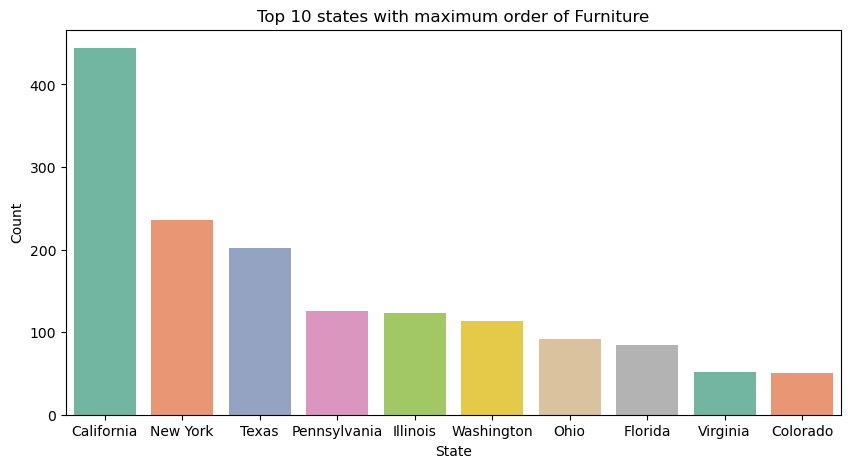

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=state_wise_10, x='State', y ='Count', palette = 'Set2')
plt.title('Top 10 states with maximum order of Furniture')
plt.show()

In [31]:
furniture_sub = furn.groupby(['Sub-Category']).agg('sum').reset_index()
furniture_sub = furniture_sub.drop(['Postal Code','Quantity','Discount'], axis=1)
furniture_sub

,Sub-Category,Sales,Profit
0,Bookcases,114879.9963,-3472.5560
1,Chairs,327777.7610,26567.1278
2,Furnishings,91683.0240,13052.7230
3,Tables,206965.5320,-17725.4811


In [32]:
Total_profit_furn = furniture_sub['Profit'].sum()
Total_sale_furn = furniture_sub['Sales'].sum()

<Figure size 1000x500 with 0 Axes>

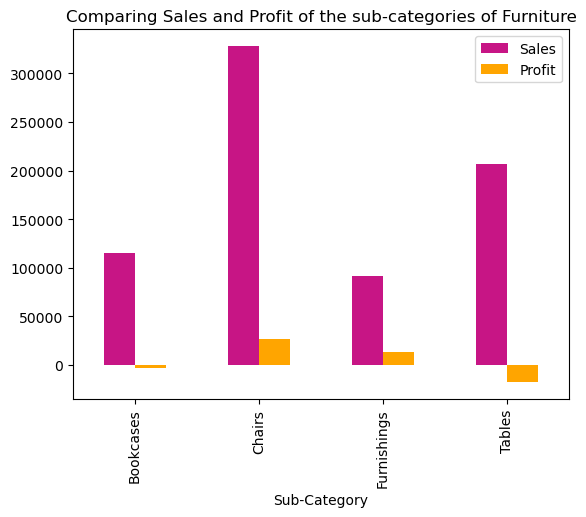

Total sale in Furniture Category 741306.31
Total profit in Furniture Category 18421.81


In [33]:
mycolors = ['#C71585','#FFA500','#800080','#40E0D0','#EE82EE','#FF6347','#9ACD32']

plt.figure(figsize=(10,5))
furniture_sub.plot(kind = 'bar', x='Sub-Category', color = mycolors)
plt.title('Comparing Sales and Profit of the sub-categories of Furniture')
plt.show()

print('Total sale in Furniture Category {r:1.2f}'.format(r=Total_sale_furn))
print('Total profit in Furniture Category {r:1.2f}'.format(r=Total_profit_furn))

### Insights

We can see from the above graph that Chairs has the maximum sales and profit.
Tables has good sale but is in loss(i.e Its profit is in negative direction). Same with bookcases.
This overall shows that the profita of Fruniture category is affected due to tables and bookcases.

## Office Supplies

In [34]:
office = df[df['Category']=='Office Supplies']
office.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.900,5,0.0,34.4700


In [35]:
statewise_off = office.groupby(['State']).agg('count').reset_index()
statewise_off = statewise_off.iloc[:,0:2]
statewise_off.columns = ['State','Count']
statewise_off = statewise_off.sort_values(by='Count', ascending=False)
statewise_off_10 = statewise_off.head(10)
statewise_off_10

,State,Count
3,California,1193
30,New York,683
41,Texas,602
36,Pennsylvania,342
45,Washington,289
11,Illinois,284
33,Ohio,274
8,Florida,229
20,Michigan,159
31,North Carolina,156


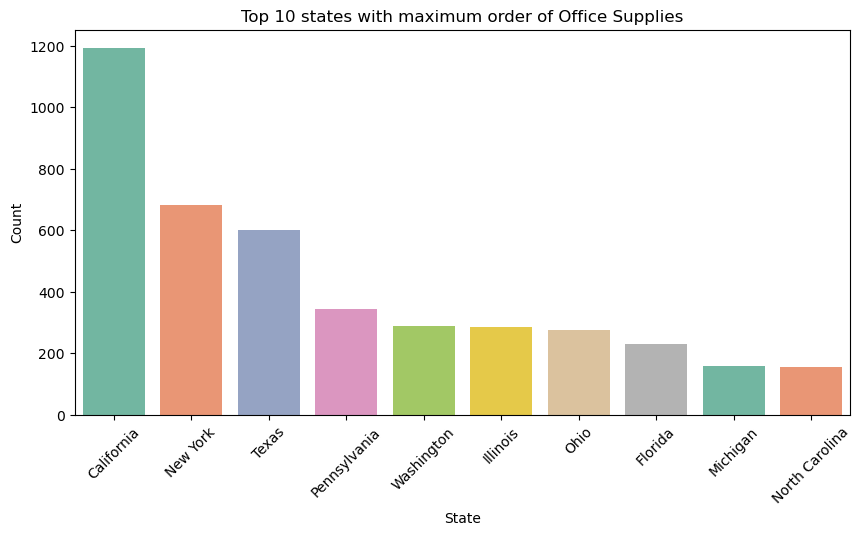

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=statewise_off_10, x='State', y ='Count', palette = 'Set2')
plt.title('Top 10 states with maximum order of Office Supplies')
plt.xticks(rotation = 45)
plt.show()

In [37]:
office_sub = office.groupby(['Sub-Category']).agg('sum').reset_index()
office_sub = office_sub.drop(['Postal Code','Quantity','Discount'], axis=1)
office_sub

,Sub-Category,Sales,Profit
0,Appliances,107532.161,18138.0054
1,Art,27107.032,6524.6118
2,Binders,203409.169,30228.0003
3,Envelopes,16476.402,6964.1767
4,Fasteners,3024.280,949.5182
5,Labels,12444.912,5526.3820
6,Paper,78224.142,33944.2395
7,Storage,223843.608,21278.8264
8,Supplies,46673.538,-1189.0995


In [38]:
Total_profit_off = office_sub['Profit'].sum()
Total_sale_off = office_sub['Sales'].sum()


<Figure size 1000x500 with 0 Axes>

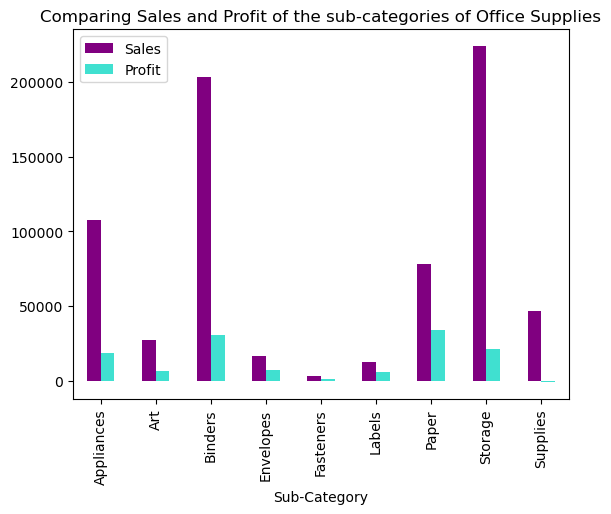

Total sale in Office Supplies Category 718735.24
Total profit in Technology Category 122364.66


In [39]:

mycolors = ['#800080','#40E0D0','#EE82EE','#FF6347','#9ACD32']

plt.figure(figsize=(10,5))
office_sub.plot(kind = 'bar', x='Sub-Category', color = mycolors)
plt.title('Comparing Sales and Profit of the sub-categories of Office Supplies')
plt.show()

print('Total sale in Office Supplies Category {r:1.2f}'.format(r=Total_sale_off))
print('Total profit in Technology Category {r:1.2f}'.format(r=Total_profit_off))

### Insight
As per the graph we can see that Storage has the maximum sale followed by Binders. Whereas, Binders and Paper has the maximum profit.
There is a little loss in Supplies sub_category.

## Technology

In [40]:
technology = df[df['Category']=='Technology']
technology.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,United States,San Francisco,California,94109,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,United States,Los Angeles,California,90049,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737


In [41]:
statewise_tech = technology.groupby(['State']).agg('count').reset_index()
statewise_tech = statewise_tech.iloc[:,0:2]
statewise_tech.columns = ['State','Count']
statewise_tech = statewise_tech.sort_values(by='Count', ascending=False)
statewise_tech_10 = statewise_tech.head(10)
statewise_tech_10

,State,Count
3,California,359
30,New York,208
40,Texas,179
35,Pennsylvania,119
32,Ohio,102
44,Washington,100
11,Illinois,84
8,Florida,69
31,North Carolina,51
1,Arizona,48


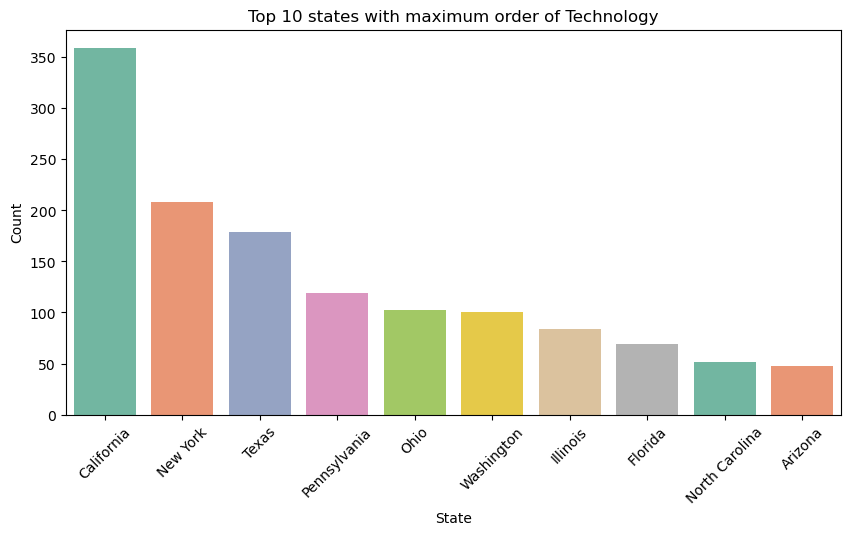

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(data=statewise_tech_10, x='State', y ='Count', palette = 'Set2')
plt.title('Top 10 states with maximum order of Technology')
plt.xticks(rotation = 45)
plt.show()

In [43]:
tech_sub = technology.groupby(['Sub-Category']).agg('sum').reset_index()
tech_sub = tech_sub.drop(['Postal Code','Quantity','Discount'], axis=1)
tech_sub

,Sub-Category,Sales,Profit
0,Accessories,167380.318,41936.6357
1,Copiers,149528.030,55617.8249
2,Machines,189238.631,3384.7569
3,Phones,330007.054,44515.7306


In [44]:
Total_profit_tech = tech_sub['Profit'].sum()
Total_sale_tech = tech_sub['Sales'].sum()

<Figure size 1000x500 with 0 Axes>

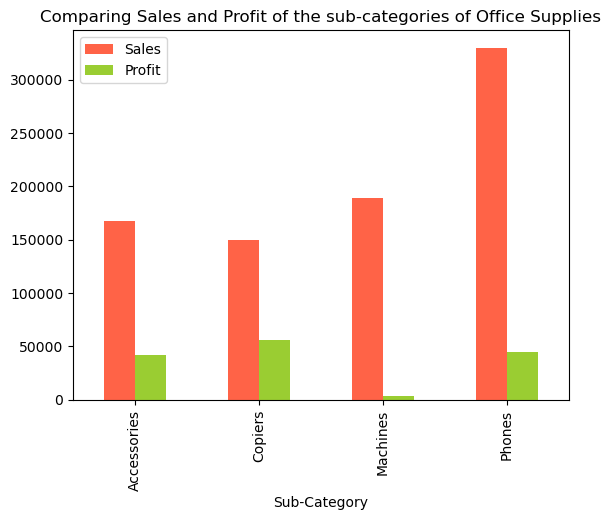

Total sale in Technology Category 836154.03
Total profit in Technology Category 145454.95


In [45]:
mycolors = ['#FF6347','#9ACD32']

plt.figure(figsize=(10,5))
tech_sub.plot(kind = 'bar', x='Sub-Category', color = mycolors)
plt.title('Comparing Sales and Profit of the sub-categories of Office Supplies')
plt.show()

print('Total sale in Technology Category {r:1.2f}'.format(r=Total_sale_tech))
print('Total profit in Technology Category {r:1.2f}'.format(r=Total_profit_tech))

### Insight

We can see that Technology is a profitable category. 
Phones are the most saled product.
Copiers has the maximum profit followed by phone.

### Comparing the Discount of each category.

In [46]:
discount = df.groupby(['Category'])['Discount'].agg('sum').reset_index()
discount

,Category,Discount
0,Furniture,368.59
1,Office Supplies,946.20
2,Technology,244.40


Maximum discount is offered on office supplies.

## Comparing the profits

In [47]:
data = [{'Category':'Furniture', 'Sale': Total_sale_furn, 'Profit': Total_profit_furn},
       {'Category':'Office Supply', 'Sale': Total_sale_off, 'Profit': Total_profit_off},
       {'Category':'Technology', 'Sale': Total_sale_tech, 'Profit': Total_profit_tech}]

In [48]:
sale_profit = pd.DataFrame(data)
sale_profit

,Category,Sale,Profit
0,Furniture,741306.3133,18421.8137
1,Office Supply,718735.2440,122364.6608
2,Technology,836154.0330,145454.9481


In [49]:
per = []
for i in range(0,3):
    per.append((sale_profit['Profit'][i]*100)/sale_profit['Sale'][i])
    

In [50]:
sale_profit['Percentage'] = per

In [51]:
sale_profit

,Category,Sale,Profit,Percentage
0,Furniture,741306.3133,18421.8137,2.485047
1,Office Supply,718735.2440,122364.6608,17.024998
2,Technology,836154.0330,145454.9481,17.395712


## Insight

It can be seen from the table that Furniture category has very low profit. Also, its profit is affected because of Table and Bookcase.


## Conclusion
1. Maximum orders are from California, New York, Texas 
2. The most preffered shipping mode is **Standard Class**
3. Maximum orders are from **Consumer Segment**
4. Category with maximum order is **Office Supplies**

#### Region
1. Maximum Sale is in **west** region
2. Maximum profit is in **west** region
3. Maximum discount is given **central** region

#### Max Order - Category and Sub-Category wise
1. Maximum order in Furniture category is of **Furnishing** and **Chairs**
2. Maximum order in Office Supplies Category is of **Binders** and **Papers**
3. Maximum order in Technology Category is of **Phones** and **Accessories**

#### Max Sale - Category and Sub-Category Wise
1. Maximum sale in Furniture category is of **Chair** and **Table**
2. Maximum sale in Office Supplies category is of **Storage** and **Binders**
3. Maximum sale in Technology category is of **Phones** and **Machines**

#### Max Profit and Loss - Category and Sub-Category Wise
1. Furniture category - **Chairs** has max profit. There is loss in **Bookcases** and **Tables**
2. Office Supplies category - **Papers** and **Binders** has max profit. There is loss in **Supplies**
3. Technology category - **Copiers** and **Accessories** has max profit.
##### Furniture category has the lowest profit compared to other 2 categories.

## Solution
1. The states where the sale is less we need to do the advertise of our supermarket.
2. As we can see that the profit of Furniture category is very low as 2 sub- categories are in loss. We need to give special discounts on those category.
3. Max discount is given in central region but the sales there are very less. Proper marketing is required. Also, we need understand the proper requirements.